In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x = [-.99768, -.69574, -.40373, -.10236, .22024, .47742, .82229]
y = [2.0885, 1.1646, .3287, .46013, .44808, .10013, -.32952]
input_data = pd.DataFrame(list(zip(x,y)), columns = ['x', 'y'])
display(input_data)

,x,y
0,-0.99768,2.08850
1,-0.69574,1.16460
2,-0.40373,0.32870
3,-0.10236,0.46013
4,0.22024,0.44808
5,0.47742,0.10013
6,0.82229,-0.32952


In [4]:
x = np.array(input_data.x)
y = input_data.y

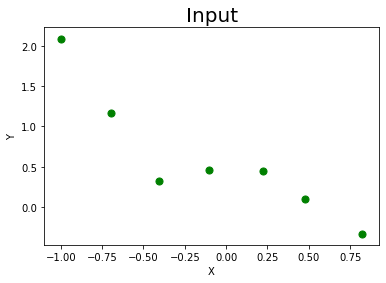

In [6]:
plt.title("Input", fontsize=20)
plt.scatter(x,y,s=50,c='g')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [8]:
import statsmodels.api as sm

In [9]:
x1 = sm.add_constant(x)
m1 = sm.OLS(y,x1).fit()
print("m1 SSE", m1.ssr)

m1 SSE 0.7107401451797565


In [10]:
x3 = sm.add_constant(np.column_stack([x, np.square(x), np.power(x,3), np.power(x,4), np.power(x,5)]))
m3 = sm.OLS(y, x3).fit()
print("m3 SSE", m3.ssr)

m3 SSE 0.010562888801624653


In [39]:
# start regularization now
X = x3
y = np.array(y)
n_col = X.shape[1]
d = np.identity(n_col)
d[0,0]  = 0
w = []

In [40]:
# perform least squares solution to the equation Ax = B
# in here, we are setting up the L2 ridge regression
# \beta*(X^T*X + \lambda*I) = X^T*y, effectively \beta = (X^T*y) / (X^T*X + \lambda*I)
reg = 0
soln = np.linalg.lstsq(X.T.dot(X) + reg*d, X.T.dot(y), rcond=None)
w.append(soln[0])
display(w)

[array([ 0.47252877,  0.68135289, -1.38012842, -5.97768747,  2.44173268,
         4.73711433])]

In [41]:
reg=1
soln = np.linalg.lstsq(X.T.dot(X) + reg*d, X.T.dot(y), rcond=None)
w.append(soln[0])
display(w)

[array([ 0.47252877,  0.68135289, -1.38012842, -5.97768747,  2.44173268,
         4.73711433]),
 array([ 0.3975953 , -0.42066637,  0.12959211, -0.3974739 ,  0.17525553,
        -0.33938772])]

In [42]:
reg=10
soln = np.linalg.lstsq(X.T.dot(X) + reg*d, X.T.dot(y), rcond=None)
w.append(soln[0])
display(w)

[array([ 0.47252877,  0.68135289, -1.38012842, -5.97768747,  2.44173268,
         4.73711433]),
 array([ 0.3975953 , -0.42066637,  0.12959211, -0.3974739 ,  0.17525553,
        -0.33938772]),
 array([ 0.52047074, -0.18250706,  0.06064258, -0.14817721,  0.07433006,
        -0.12795737])]

In [43]:
print(w)

[array([ 0.47252877,  0.68135289, -1.38012842, -5.97768747,  2.44173268,
        4.73711433]), array([ 0.3975953 , -0.42066637,  0.12959211, -0.3974739 ,  0.17525553,
       -0.33938772]), array([ 0.52047074, -0.18250706,  0.06064258, -0.14817721,  0.07433006,
       -0.12795737])]


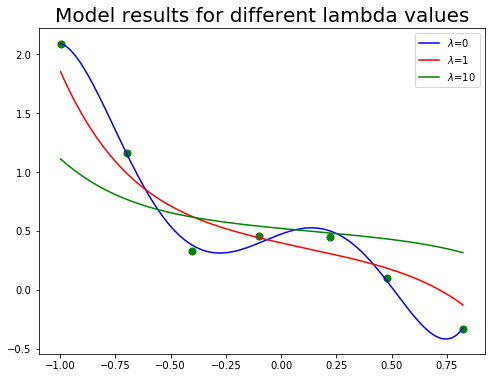

In [48]:
plt.rcParams["figure.figsize"] = (8,6)
plt.title('Model results for different lambda values', fontsize=20)
plt.scatter(x,y,s=50,c='g')
x_new = np.linspace(x.min(), x.max(), 200)
plt.plot(x_new, np.poly1d(np.polyfit(x, X.dot(w[0]), 5))(x_new), label='$\lambda$=0', c='b')
plt.plot(x_new, np.poly1d(np.polyfit(x, X.dot(w[1]), 5))(x_new), label='$\lambda$=1', c='r')
plt.plot(x_new, np.poly1d(np.polyfit(x, X.dot(w[2]), 5))(x_new), label='$\lambda$=10', c='g')
plt.legend(loc='upper right')
plt.show()